# Importing Module and define directories

In [1]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
import CC
importlib.reload(CC)
import neuron_CC
importlib.reload(neuron_CC)
from CC import CCNN

# Naive Test

In [2]:
input_data = [[0,0],
              [0,1],
              [1,0],
              [1,1]]
labels = [0,0,0,1]
input_data = np.array(input_data)
labels = np.array(labels).reshape((len(labels),1))

In [3]:
hidden_func = 'sigmoid'
output_func = 'sigmoid'
start=1
learning_rate=0.1
netw = CCNN(w_init = start, hidden_actv_f = hidden_func,
            output_actv_f= output_func)

In [4]:
netw.train(input_data, labels,  eta = learning_rate, max_epoch = 10000)

Train with 0 hidden neu ended because error low enough



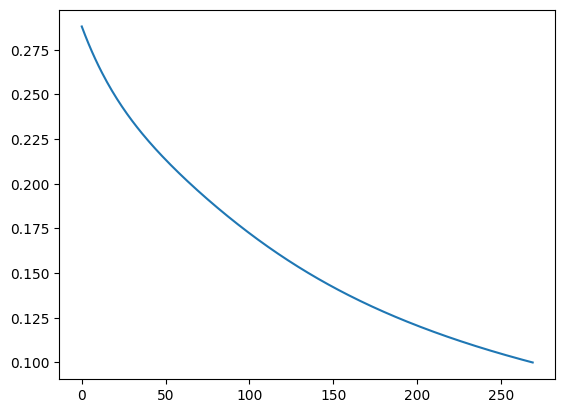

In [5]:
plt.plot(netw.train_MSE)
plt.show()

## XOR test

In [6]:
input_data = [[0,0],
              [0,1],
              [1,0],
              [1,1]]
labels = [1,0,0,1]
input_data = np.array(input_data)
labels = np.array(labels).reshape((len(labels),1))

In [25]:
hidden_func = 'sigmoid'
output_func = 'sigmoid'
start=1
learning_rate=0.1
netw = CCNN(w_init = start, hidden_actv_f = hidden_func,
            output_actv_f= output_func)

In [26]:
netw.train(input_data, labels,
           eta = learning_rate,
           min_epoch = 200, 
           max_epoch = int(1e4),
           stack_threshold = 0.1,
           stop_threshold = 0.05,
           max_hidden = 10, 
           n_candidate = 10,
           candidate_eta = 5,
           candidate_lambda = 0.,
           max_candidate_epoch = 600)

adding an hidden -> Hidden added, training the new model.
Train with 0 hidden ended cause error stacked
Train with 1 hidden neu ended because error low enough



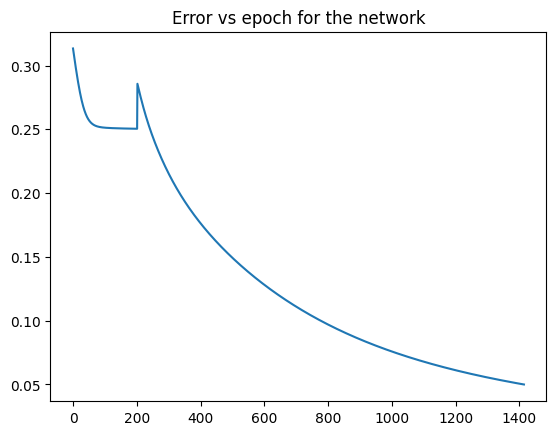

In [27]:
plt.plot(netw.train_MSE)
plt.title('Error vs epoch for the network')
plt.show()

In [10]:
netw.predict(input_data)

array([[0.80420531],
       [0.21806003],
       [0.21806312],
       [0.74223946]])

Hidden trained for 112 epoch


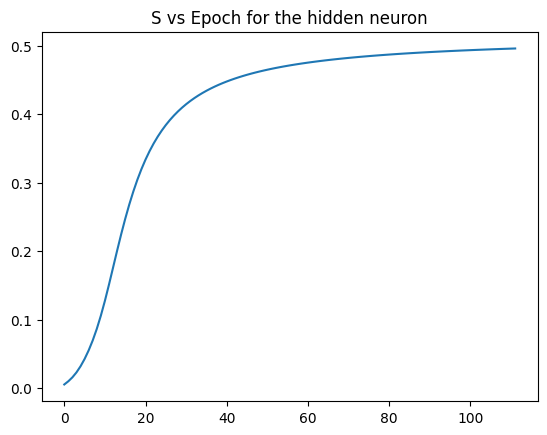

In [11]:
print(f'Hidden trained for {netw.hid_neurons[0].epoch_trained} epoch')
plt.plot(netw.hid_neurons[0].S_list)
plt.title('S vs Epoch for the hidden neuron')
plt.show()

# Train - Validation Split

In [28]:
def plot_results(network):
    train_pred = network.predict(input_data)
    val_pred = network.predict(val_data)
    x = np.arange(len(network.train_MEE))

    fig = plt.figure(figsize=(13,4))

    fig.add_subplot(131)
    plt.plot(x,network.train_MEE)
    plt.plot(x,network.val_MEE,label="test")
    plt.title("Learning curve")
    plt.xlabel("Epochs")
    plt.ylabel("Squared error")
    plt.yscale("log")
    plt.legend()

    fig.add_subplot(132)
    plt.title('Residual for training data')
    plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(labels)),labels[:,1]-train_pred[:,1],".",label="residual1")
    plt.legend()

    fig.add_subplot(133)
    plt.title('Residual for validation data')
    plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(val_labels)),val_labels[:,1]-val_pred[:,1],".",label="residual1")
    plt.legend()
    plt.tight_layout()
    plt.show()
    netw.predict(input_data)

In [29]:
data=np.loadtxt("../../data/TR.csv",delimiter=",")
input_data=data[:,1:-2][0:1000]
labels=data[:,-2:][0:1000]
val_data=data[:,1:-2][1000:-1]
val_labels=data[:,-2:][1000:-1]

# Define the MLP

In [37]:
hidden_func = 'sigmoid'
output_func = 'linear'
start=0.001
learning_rate=0.0002
netw = CCNN(w_init = start, hidden_actv_f = hidden_func,
            output_actv_f= output_func)

## Train the model

In [38]:
start = time.time()
netw.train(input_data, labels,
           val_data, val_labels,
           eta = learning_rate,
           min_epoch = 100, 
           max_epoch = int(1e4),
           stack_threshold = 0.0001,
           stop_threshold = 0.1,
           max_hidden = 3, 
           n_candidate = 10,
           candidate_eta = 0.01,
           candidate_lambda = 0.0001,
           max_candidate_epoch = 2000)
print(f'Elapsed time for training {time.time()-start} s')

adding an hidden -> Hidden added, training the new model.
adding an hidden -> Hidden added, training the new model.
adding an hidden -> Hidden added, training the new model.
Train with 0 hidden ended cause error stacked
Train with 1 hidden ended cause error stacked
Train with 2 hidden ended cause error stacked
Train with 3 hidden ended cause error stacked

Elapsed time for training 8.321139097213745 s


In [39]:
netw.num_hidden

3

## Predict the output

In [40]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

# Plot results

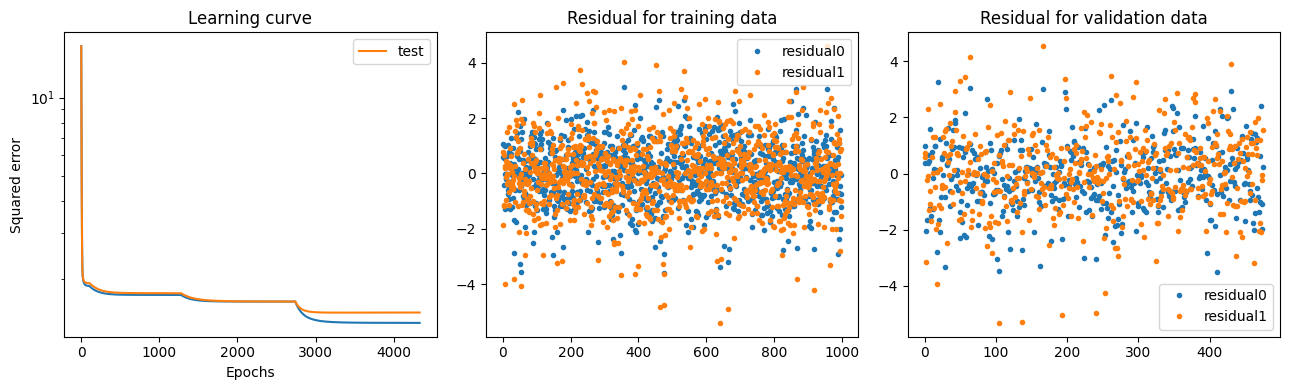

In [41]:
plot_results(netw)

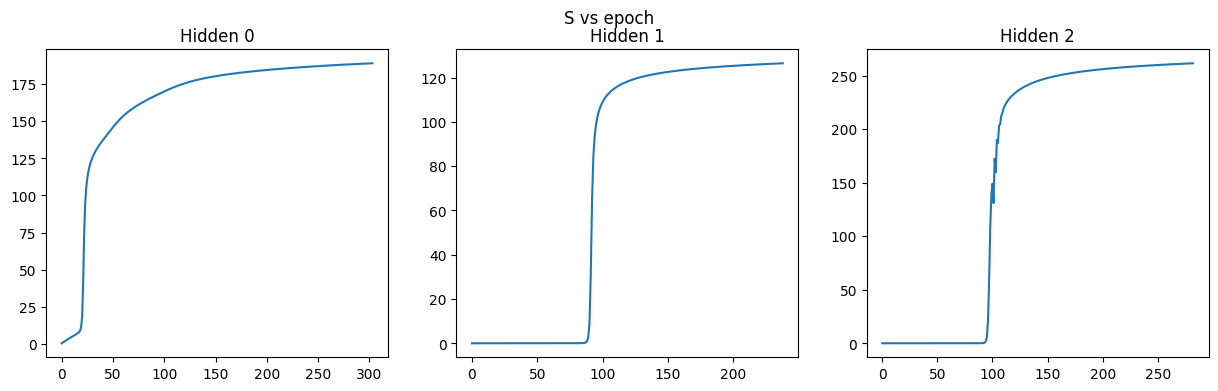

In [42]:
fig, axs = plt.subplots(1, len(netw.hid_neurons), figsize = (15, 4))
for i, hidden in enumerate(netw.hid_neurons):
    axs[i].plot(hidden.S_list)
    axs[i].set_title(f'Hidden {i}')
plt.suptitle('S vs epoch')
plt.show()

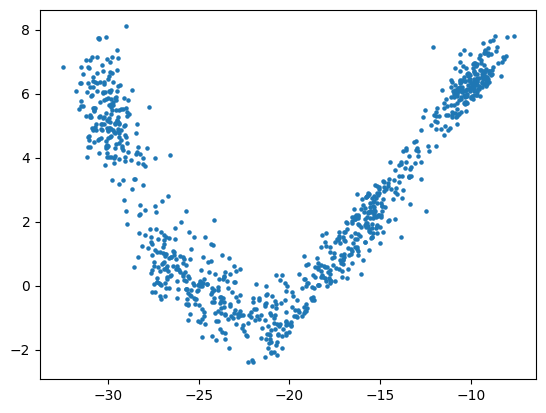

In [55]:
plt.scatter(train_pred[:,1], train_pred[:,0], s = 5)
plt.show()